In [2]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns',None)

In [4]:
# loading dataset
df = pd.read_csv('data/gurgaon_properties_outlier_treatment.csv')

In [5]:
df.head()

,property_type,society,sector,price,area,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,dlf regal gardens,sector 90,1.29,1430.0,9021.0,Super Built up area 1702(158.12 sq.m.)Built Up...,3,3,3,7.0,East,Relatively New,1702.0,1540.0,1430.0,1,0,0,0,0,2,174,476.666667
1,flat,ireo the grand arch,sector 58,2.20,1375.0,16000.0,Carpet area: 1375 (127.74 sq.m.),2,2,1,5.0,East,Relatively New,NaN,NaN,1375.0,0,0,0,1,0,1,49,687.500000
2,flat,ireo victory valley,sector 67,2.95,2436.0,12110.0,Super Built up area 2436(226.31 sq.m.)Built Up...,3,3,3+,14.0,South,Moderately Old,2436.0,2236.0,2036.0,0,1,0,1,0,1,165,812.000000
3,flat,puri emerald bay,sector 104,2.23,2250.0,9911.0,Super Built up area 2450(227.61 sq.m.)Carpet a...,3,4,3+,10.0,East,Relatively New,2450.0,NaN,2250.0,0,1,0,0,0,1,159,750.000000
4,flat,raheja vedaanta,sector 108,0.70,1548.0,4522.0,Built Up area: 1548 (143.81 sq.m.)Carpet area:...,2,2,3,1.0,West,Undefined,NaN,1548.0,1200.0,0,0,0,0,0,2,0,774.000000


In [6]:
# checking the missing values
df.isnull().sum()

property_type             0
society                   0
sector                    0
price                     0
area                      0
price_per_sqft            0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                  87
floorNum                 17
facing                  843
agePossession             0
super_built_up_area    1775
built_up_area          2050
carpet_area            1779
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [7]:
df.shape

(3690, 24)

**`super_built_up_area` column**

In [8]:
df['super_built_up_area'].isnull().sum()

np.int64(1775)

In [9]:
missing_percent = (df['super_built_up_area'].isnull().sum()/df.shape[0])*100
missing_percent

np.float64(48.1029810298103)

In [10]:
# checking the common missing values in super_build_up_area,built_up_area and carpet_area
df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())]

,property_type,society,sector,price,area,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio


In [11]:

((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))

0       False
1       False
2       False
3       False
4       False
        ...  
3685    False
3686    False
3687    False
3688    False
3689    False
Length: 3690, dtype: bool

In [12]:
df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))]

,property_type,society,sector,price,area,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,dlf regal gardens,sector 90,1.29,1430.0,9021.0,Super Built up area 1702(158.12 sq.m.)Built Up...,3,3,3,7.0,East,Relatively New,1702.0,1540.0,1430.00,1,0,0,0,0,2,174,476.666667
2,flat,ireo victory valley,sector 67,2.95,2436.0,12110.0,Super Built up area 2436(226.31 sq.m.)Built Up...,3,3,3+,14.0,South,Moderately Old,2436.0,2236.0,2036.00,0,1,0,1,0,1,165,812.000000
9,flat,emaar mgf emerald floors premier,sector 65,2.75,1975.0,13924.0,Super Built up area 1975(183.48 sq.m.)Built Up...,4,4,3,3.0,North-West,Relatively New,1975.0,1750.0,1650.00,1,1,0,0,0,1,113,493.750000
10,flat,ss the leaf,sector 85,1.20,970.0,12371.0,Super Built up area 1671(155.24 sq.m.)Built Up...,2,2,2,4.0,East,Relatively New,1671.0,1190.0,970.00,0,1,1,0,0,2,81,485.000000
11,flat,corona optus,sector 37c,1.22,1765.0,6912.0,Super Built up area 1765(163.97 sq.m.)Built Up...,3,4,3,5.0,South-East,Relatively New,1765.0,1665.0,1565.00,0,0,0,0,0,2,149,588.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3654,flat,shapoorji pallonji joyville gurugram,sector 102,2.00,1128.0,17730.0,Super Built up area 1852(172.06 sq.m.)Built Up...,3,3,3+,1.0,South,Relatively New,1852.0,1456.0,1128.09,0,0,1,0,0,2,139,376.000000
3663,flat,dlf the belaire,sector 54,10.00,4072.0,24558.0,Super Built up area 4072(378.3 sq.m.)Built Up ...,4,5,3+,17.0,North,Moderately Old,4072.0,3000.0,2800.00,0,1,0,0,0,0,167,1018.000000
3666,flat,hsiidc sidco aravali,manesar,0.81,2589.0,3129.0,Super Built up area 2588(240.43 sq.m.)Built Up...,3,3,3+,2.0,South-West,Moderately Old,2588.0,1900.0,1877.00,0,1,0,0,0,2,74,863.000000
3667,flat,central park resorts,sector 48,5.15,2464.0,20901.0,Super Built up area 2464(228.91 sq.m.)Built Up...,3,3,3+,8.0,North-West,Moderately Old,2464.0,2364.0,2264.00,0,1,0,0,0,0,53,821.333333


In [13]:
all_present_area = df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))]

In [14]:
all_present_area.head()

,property_type,society,sector,price,area,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,dlf regal gardens,sector 90,1.29,1430.0,9021.0,Super Built up area 1702(158.12 sq.m.)Built Up...,3,3,3,7.0,East,Relatively New,1702.0,1540.0,1430.0,1,0,0,0,0,2,174,476.666667
2,flat,ireo victory valley,sector 67,2.95,2436.0,12110.0,Super Built up area 2436(226.31 sq.m.)Built Up...,3,3,3+,14.0,South,Moderately Old,2436.0,2236.0,2036.0,0,1,0,1,0,1,165,812.000000
9,flat,emaar mgf emerald floors premier,sector 65,2.75,1975.0,13924.0,Super Built up area 1975(183.48 sq.m.)Built Up...,4,4,3,3.0,North-West,Relatively New,1975.0,1750.0,1650.0,1,1,0,0,0,1,113,493.750000
10,flat,ss the leaf,sector 85,1.20,970.0,12371.0,Super Built up area 1671(155.24 sq.m.)Built Up...,2,2,2,4.0,East,Relatively New,1671.0,1190.0,970.0,0,1,1,0,0,2,81,485.000000
11,flat,corona optus,sector 37c,1.22,1765.0,6912.0,Super Built up area 1765(163.97 sq.m.)Built Up...,3,4,3,5.0,South-East,Relatively New,1765.0,1665.0,1565.0,0,0,0,0,0,2,149,588.333333


In [15]:
all_present_area.shape

(534, 24)

In [16]:
# calculating the super_built_up_area to built_up_area ratio
super_to_built_up_ratio = (all_present_area['super_built_up_area']/all_present_area['built_up_area']).median()

# calculating the carpet_area to built_up_area ratio
carpet_to_built_up_ratio = (all_present_area['carpet_area']/all_present_area['built_up_area']).median()

print(f"Super builtup area to builtup area ratio = {super_to_built_up_ratio}")
print(f"Carpet area to builtup area ratio = {carpet_to_built_up_ratio}")

Super builtup area to builtup area ratio = 1.1048701298701298
Carpet area to builtup area ratio = 0.900140056022409


In [17]:
# rows where only built_up_area is missing
temp_df = df[~(df['super_built_up_area'].isnull()) & df['built_up_area'].isnull() & ~(df['carpet_area'].isnull())]
temp_df.head()

,property_type,society,sector,price,area,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
3,flat,puri emerald bay,sector 104,2.23,2250.0,9911.0,Super Built up area 2450(227.61 sq.m.)Carpet a...,3,4,3+,10.0,East,Relatively New,2450.0,NaN,2250.0,0,1,0,0,0,1,159,750.0
27,flat,breez global heights,sohna road,0.40,623.0,6421.0,Super Built up area 623(57.88 sq.m.)Carpet are...,2,2,1,4.0,North-East,New Property,623.0,NaN,599.0,0,0,0,0,0,2,49,311.5
31,flat,godrej aria,sector 79,1.70,2289.0,7427.0,Super Built up area 2289(212.66 sq.m.)Carpet a...,3,4,3+,6.0,East,New Property,2289.0,NaN,1121.0,0,1,0,0,0,2,81,763.0
38,flat,godrej air,sector 85,1.30,894.0,14541.0,Super Built up area 1400(130.06 sq.m.)Carpet a...,2,2,3,30.0,NaN,Undefined,1400.0,NaN,894.0,0,0,0,0,0,2,111,447.0
40,flat,bestech park view city,sector 48,1.78,1776.0,10023.0,Super Built up area 1776(165 sq.m.)Carpet area...,3,4,2,5.0,NaN,Relatively New,1776.0,NaN,1300.0,1,0,0,1,0,2,53,592.0


In [18]:
# calculating the built_up_area in temp_df
temp_df['built_up_area'].fillna(round(((temp_df['super_built_up_area']/1.104) + (temp_df['carpet_area']/0.9))/2),inplace=True)

C:\Users\aasth\AppData\Local\Temp\ipykernel_21200\2374035271.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  temp_df['built_up_area'].fillna(round(((temp_df['super_built_up_area']/1.104) + (temp_df['carpet_area']/0.9))/2),inplace=True)
C:\Users\aasth\AppData\Local\Temp\ipykernel_21200\2374035271.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

In [19]:
df.update(temp_df)

In [20]:
df.isnull().sum()

property_type             0
society                   0
sector                    0
price                     0
area                      0
price_per_sqft            0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                  87
floorNum                 17
facing                  843
agePossession             0
super_built_up_area    1775
built_up_area          1622
carpet_area            1779
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [21]:
# rows having only super_built_up_area  
sb_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())]
sb_df.head()

,property_type,society,sector,price,area,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
8,flat,m3m heights,sector 65,2.33,1261.0,18477.0,Super Built up area 1261(117.15 sq.m.),2,2,3,35.0,North-East,Under Construction,1261.0,NaN,NaN,0,0,0,0,0,1,49,630.500000
12,flat,sare crescent parc,sector 92,0.90,2104.0,4278.0,Super Built up area 1870(173.73 sq.m.),4,5,3+,14.0,North-East,Relatively New,1870.0,NaN,NaN,0,1,0,0,1,2,62,526.000000
13,flat,godrej summit,sector 104,1.25,1844.0,6779.0,Super Built up area 1844(171.31 sq.m.),3,4,3+,12.0,East,Relatively New,1844.0,NaN,NaN,0,1,0,0,1,2,79,614.666667
16,flat,bestech park view residency,sector 2,1.36,1779.0,7645.0,Super Built up area 1780(165.37 sq.m.),3,3,3+,5.0,South-West,Moderately Old,1780.0,NaN,NaN,0,0,0,0,0,2,84,593.000000
21,flat,smart world gems,sector 89,1.25,1423.0,8784.0,Super Built up area 1423(132.2 sq.m.),3,3,3,2.0,North,Undefined,1423.0,NaN,NaN,0,0,0,1,0,2,12,474.333333


In [22]:
sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.104),inplace=True)

C:\Users\aasth\AppData\Local\Temp\ipykernel_21200\501753344.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.104),inplace=True)
C:\Users\aasth\AppData\Local\Temp\ipykernel_21200\501753344.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sb_df['built_up_area'].fillna(round

In [23]:
df.update(sb_df)

In [24]:
df.isnull().sum()

property_type             0
society                   0
sector                    0
price                     0
area                      0
price_per_sqft            0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                  87
floorNum                 17
facing                  843
agePossession             0
super_built_up_area    1775
built_up_area           719
carpet_area            1779
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [25]:
# row having only the carpet area
carpet_area_df = df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [26]:
carpet_area_df.head()

,property_type,society,sector,price,area,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
1,flat,ireo the grand arch,sector 58,2.20,1375.0,16000.0,Carpet area: 1375 (127.74 sq.m.),2,2,1,5.0,East,Relatively New,NaN,NaN,1375.0,0,0,0,1,0,1,49,687.5
5,flat,la vida by tata housing,sector 113,1.50,1276.0,11755.0,Carpet area: 1276 (118.54 sq.m.),2,2,2,13.0,NaN,New Property,NaN,NaN,1276.0,0,0,0,0,0,2,71,638.0
6,flat,green court,sector 90,0.47,690.0,6812.0,Carpet area: 690 (64.1 sq.m.),2,2,1,0.0,East,New Property,NaN,NaN,690.0,0,0,0,0,0,2,49,345.0
14,flat,raheja the vedaanta floors,sector 108,0.70,1548.0,4522.0,Carpet area: 1548 (143.81 sq.m.),2,2,3,1.0,NaN,Moderately Old,NaN,NaN,1548.0,0,0,0,0,0,1,0,774.0
18,house,project housing board colony,sector 28,2.58,1458.0,17695.0,Carpet area: 1300 (120.77 sq.m.),4,2,2,2.0,not available,Undefined,NaN,NaN,1300.0,0,0,0,0,0,2,0,364.5


In [27]:
carpet_area_df.shape

(719, 24)

In [28]:
carpet_area_df['built_up_area'].fillna(round(carpet_area_df['carpet_area']/0.9),inplace=True)

C:\Users\aasth\AppData\Local\Temp\ipykernel_21200\2436806302.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  carpet_area_df['built_up_area'].fillna(round(carpet_area_df['carpet_area']/0.9),inplace=True)
C:\Users\aasth\AppData\Local\Temp\ipykernel_21200\2436806302.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  carpet_area_df['built_up_

In [29]:
df.update(carpet_area_df)

In [30]:
df.isnull().sum()

property_type             0
society                   0
sector                    0
price                     0
area                      0
price_per_sqft            0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                  87
floorNum                 17
facing                  843
agePossession             0
super_built_up_area    1775
built_up_area             0
carpet_area            1779
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

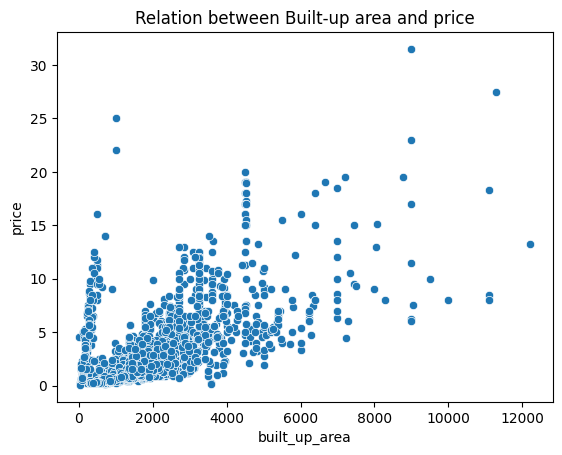

In [31]:
# checking the relation between built_up_area and price
sns.scatterplot(x= df['built_up_area'], y=df['price'])
plt.title('Relation between Built-up area and price')
plt.show()

The above graph shows that there is a linear relationship between the built-up area and propertiy price but there are some anamoly.
- properties having built_up_area less than 2000 are having price even greater then 2.5 crores.

In [32]:
anamoly_df = df[(df['built_up_area']<2000) & (df['price']>2.5)]

In [33]:
anamoly_df.sample(5)

,property_type,society,sector,price,area,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
3305,flat,m3m heights,sector 65,3.00,1667.0,17996.0,Super Built up area 1828(169.83 sq.m.),3,3,3,20.0,South-East,Under Construction,1828.00,1656.00,NaN,0,0,0,0,0,2,60,555.666667
3224,flat,bestech altura,sector 79,2.69,2152.0,12500.0,Super Built up area 2150(199.74 sq.m.),3,4,3+,3.0,NaN,New Property,2150.00,1947.00,NaN,0,1,0,0,0,2,49,717.333333
1261,house,independent,sector 9a,4.50,3150.0,14286.0,Plot area 14(354.1 sq.m.),9,9,3+,3.0,not available,Relatively New,NaN,14.00,NaN,1,0,0,1,1,1,38,350.000000
2377,house,unitech escape,sector 50,12.00,3240.0,37037.0,Carpet area: 360 (301.01 sq.m.),5,6,3+,3.0,East,Undefined,NaN,400.00,360.0,0,0,0,0,0,2,66,648.000000
451,flat,vatika city,sector 49,2.65,2251.0,11773.0,Super Built up area 2251.42(209.16 sq.m.)Built...,3,4,3,11.0,East,Moderately Old,2251.42,1750.75,NaN,0,1,0,1,0,1,140,750.333333


In [34]:
anamoly_df['built_up_area'] = anamoly_df['area']

C:\Users\aasth\AppData\Local\Temp\ipykernel_21200\4230953930.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anamoly_df['built_up_area'] = anamoly_df['area']


In [35]:
df.update(anamoly_df)

<Axes: xlabel='built_up_area', ylabel='price'>

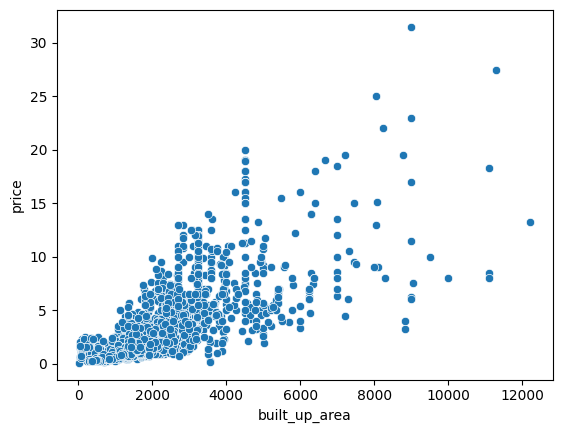

In [36]:
sns.scatterplot(x=df['built_up_area'], y=df['price'])

In [37]:
# removing the extra columns
df.drop(columns=['area', 'areaWithType','super_built_up_area','carpet_area','area_room_ratio'], inplace=True)

In [38]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,dlf regal gardens,sector 90,1.29,9021.0,3,3,3,7.0,East,Relatively New,1540.0,1,0,0,0,0,2,174
1,flat,ireo the grand arch,sector 58,2.20,16000.0,2,2,1,5.0,East,Relatively New,1528.0,0,0,0,1,0,1,49
2,flat,ireo victory valley,sector 67,2.95,12110.0,3,3,3+,14.0,South,Moderately Old,2236.0,0,1,0,1,0,1,165
3,flat,puri emerald bay,sector 104,2.23,9911.0,3,4,3+,10.0,East,Relatively New,2360.0,0,1,0,0,0,1,159
4,flat,raheja vedaanta,sector 108,0.70,4522.0,2,2,3,1.0,West,Undefined,1548.0,0,0,0,0,0,2,0


In [39]:
df.isnull().sum()

property_type        0
society              0
sector               0
price                0
price_per_sqft       0
bedRoom              0
bathroom             0
balcony             87
floorNum            17
facing             843
agePossession        0
built_up_area        0
study room           0
servant room         0
store room           0
pooja room           0
others               0
furnishing_type      0
luxury_score         0
dtype: int64

**`floorNum` column**

In [40]:
df[df['floorNum'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
438,house,independent,sector 25,13.00,45710.0,6,8,3+,NaN,not available,Relatively New,2844.0,1,1,1,1,0,0,0
943,house,jacob pura,sector 12,0.35,9722.0,2,1,NaN,NaN,not available,Old Property,360.0,0,0,0,0,0,2,0
1092,house,independent,sector 2,5.60,17284.0,8,6,3+,NaN,South-West,Moderately Old,3240.0,1,1,1,1,0,2,0
1216,house,vipul tatvam villa,sector 48,8.50,26235.0,4,4,1,NaN,not available,Relatively New,3240.0,0,0,0,0,0,2,21
1298,house,independent,sector 24,1.45,2984.0,3,3,1,NaN,not available,Old Property,540.0,0,0,0,0,0,2,9
1497,house,ansal sushant lok plots,sector 43,3.30,26570.0,1,1,NaN,NaN,not available,Under Construction,1242.0,0,0,0,0,0,2,0
1502,house,independent,sector 4,4.12,8889.0,2,1,3+,NaN,not available,Moderately Old,4635.0,0,0,0,0,0,2,0
2037,house,vipul tatvam villa,sector 48,8.50,26235.0,4,4,2,NaN,East,Moderately Old,3240.0,0,1,1,1,0,2,88
2190,house,independent,sector 2,5.60,17284.0,8,6,3+,NaN,South-West,Moderately Old,3240.0,1,1,1,1,0,2,0
2200,house,independent,sector 3,1.50,10288.0,3,3,NaN,NaN,not available,Old Property,210.0,0,0,0,0,0,2,0


- Out of 17 missing values 16 properties of house type.
- Thus, replacing the floorNum with the median of the floorNum in houses.

In [41]:
df[df['property_type']=='house']['floorNum'].median()

np.float64(2.0)

In [42]:
df['floorNum'].fillna(2.0, inplace=True)

C:\Users\aasth\AppData\Local\Temp\ipykernel_21200\721975971.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['floorNum'].fillna(2.0, inplace=True)


In [43]:
df.isnull().sum()

property_type        0
society              0
sector               0
price                0
price_per_sqft       0
bedRoom              0
bathroom             0
balcony             87
floorNum             0
facing             843
agePossession        0
built_up_area        0
study room           0
servant room         0
store room           0
pooja room           0
others               0
furnishing_type      0
luxury_score         0
dtype: int64

**`facing` column**

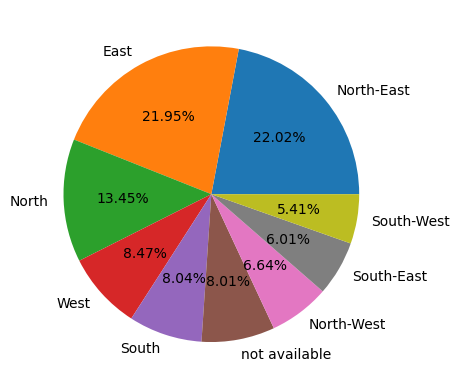

In [44]:
plt.pie(df['facing'].value_counts(),labels= df['facing'].value_counts().index, autopct='%.2f%%')
plt.show()

In [45]:
df.drop(columns='facing', inplace=True)

In [46]:
df.isnull().sum()

property_type       0
society             0
sector              0
price               0
price_per_sqft      0
bedRoom             0
bathroom            0
balcony            87
floorNum            0
agePossession       0
built_up_area       0
study room          0
servant room        0
store room          0
pooja room          0
others              0
furnishing_type     0
luxury_score        0
dtype: int64

In [47]:
df.shape

(3690, 18)

**`agePossession` column**

In [48]:
df['agePossession'].value_counts()

agePossession
Relatively New        1636
New Property           591
Moderately Old         563
Undefined              460
Old Property           303
Under Construction     137
Name: count, dtype: int64

In [49]:
df[df['agePossession']=='Undefined']

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
4,flat,raheja vedaanta,sector 108,0.70,4522.0,2,2,3,1.0,Undefined,1548.0,0,0,0,0,0,2,0
18,house,project housing board colony,sector 28,2.58,17695.0,4,2,2,2.0,Undefined,1458.0,0,0,0,0,0,2,0
21,flat,smart world gems,sector 89,1.25,8784.0,3,3,3,2.0,Undefined,1289.0,0,0,0,1,0,2,12
32,flat,ild grand,sector 37c,0.66,5038.0,2,2,3+,14.0,Undefined,1310.0,0,0,0,0,0,2,60
35,flat,unitech south park,sector 70,1.13,7001.0,3,3,2,1.0,Undefined,1458.0,0,0,0,0,0,2,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3602,house,dlf city plot phase 4,sector 28,13.00,17931.0,10,10,3+,1.0,Undefined,8056.0,0,0,0,0,0,2,0
3607,house,project mianwali colony,sector 12,2.00,14815.0,5,5,2,3.0,Undefined,1350.0,0,0,0,0,0,2,0
3661,house,independent,sector 50,7.00,32407.0,3,2,NaN,1.0,Undefined,2160.0,0,0,0,0,0,2,0
3668,house,vatika sovereign next,sector 82a,3.85,7500.0,5,6,3+,6.0,Undefined,5140.0,0,0,0,0,0,2,53


In [50]:
def mode_based_imputation(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector']) & (df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [51]:
df['agePossession'] = df.apply(mode_based_imputation,axis=1)

In [52]:
df['agePossession'].value_counts()

agePossession
Relatively New        1838
New Property           672
Moderately Old         609
Old Property           339
Under Construction     139
Undefined               93
Name: count, dtype: int64

In [53]:
def mode_based_imputation2(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [54]:
df['agePossession'] = df.apply(mode_based_imputation2,axis=1)

In [55]:
df['agePossession'].value_counts()

agePossession
Relatively New        1853
New Property           695
Moderately Old         616
Old Property           353
Under Construction     139
Undefined               34
Name: count, dtype: int64

In [56]:
def mode_based_imputation3(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [57]:
df['agePossession'] = df.apply(mode_based_imputation3,axis=1)

In [58]:
df['agePossession'].value_counts()

agePossession
Relatively New        1869
New Property           695
Moderately Old         634
Old Property           353
Under Construction     139
Name: count, dtype: int64

In [59]:
df.isnull().sum()

property_type       0
society             0
sector              0
price               0
price_per_sqft      0
bedRoom             0
bathroom            0
balcony            87
floorNum            0
agePossession       0
built_up_area       0
study room          0
servant room        0
store room          0
pooja room          0
others              0
furnishing_type     0
luxury_score        0
dtype: int64

**`balcony` column**

In [60]:
df['balcony'].value_counts()

balcony
3+    1144
3     1097
2      905
1      365
0       92
Name: count, dtype: int64

In [67]:
df = df[~(df['balcony'].isnull())]

In [68]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [69]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,dlf regal gardens,sector 90,1.29,9021.0,3,3,3,7.0,Relatively New,1540.0,1,0,0,0,0,2,174
1,flat,ireo the grand arch,sector 58,2.20,16000.0,2,2,1,5.0,Relatively New,1528.0,0,0,0,1,0,1,49
2,flat,ireo victory valley,sector 67,2.95,12110.0,3,3,3+,14.0,Moderately Old,2236.0,0,1,0,1,0,1,165
3,flat,puri emerald bay,sector 104,2.23,9911.0,3,4,3+,10.0,Relatively New,2360.0,0,1,0,0,0,1,159
4,flat,raheja vedaanta,sector 108,0.70,4522.0,2,2,3,1.0,Relatively New,1548.0,0,0,0,0,0,2,0


In [73]:
df.shape

(3603, 18)

In [75]:
df.to_csv('data/gurgaon_properties(missing_value_imputation).csv', index=False)